In [1]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

In [3]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [8]:
STOCK_DATA_LOC = join('..', 'data', 'stocks')
high_beta = ['WMB', 'CHK', 'FCX', 'WDC', 'APA']
low_beta = ['FDP', 'AWK', 'BMY',  'CPB', 'WEC']

In [9]:
trd.download_stock_histories(join(STOCK_DATA_LOC, 'high_beta'),
                             high_beta, start_date=np.datetime64('2011-01-01'))

In [10]:
trd.download_stock_histories(join(STOCK_DATA_LOC, 'low_beta'),
                             low_beta, start_date=np.datetime64('2011-01-01'))

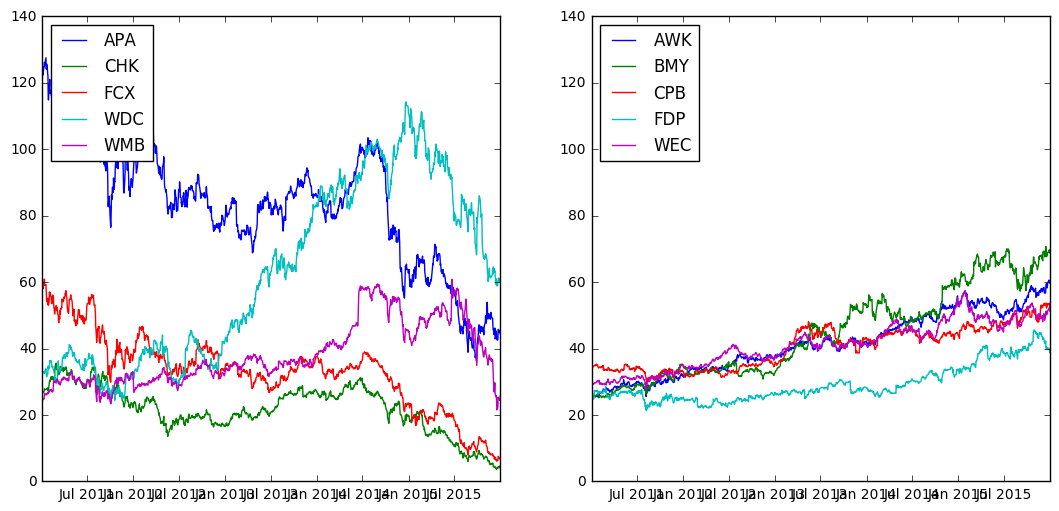

In [12]:
f = plt.figure(figsize=(13, 6))
ax1 = plt.subplot(1, 2, 1)

stock_files = glob.glob(join(STOCK_DATA_LOC, 'high_beta', '*.csv'))
tickers = dict()

for f in stock_files: 
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    # standardize data for plotting / comparrison
    d = pd.DataFrame(data={'CloseNorm': preprocessing.scale(c), 'Close':c})
    tickers[s] = d
    
    ax1.plot_date(d.index, d.Close, label=s, ls='solid', marker='')

#ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax1.legend(loc='upper left')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)

stock_files = glob.glob(join(STOCK_DATA_LOC, 'low_beta', '*.csv'))
tickers = dict()

for f in stock_files: 
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    # standardize data for plotting / comparrison
    d = pd.DataFrame(data={'CloseNorm': preprocessing.scale(c), 'Close':c})
    tickers[s] = d
    
    ax2.plot_date(d.index, d.Close, label=s, ls='solid', marker='')

ax2.legend(loc='upper left')